# Linear Regression

In [1]:
! wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ" -O weight_height.csv && rm -rf ~/cookies.txt

--2023-04-17 09:45:59--  https://docs.google.com/uc?export=download&confirm=&id=1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ
Resolving docs.google.com (docs.google.com)... 173.194.214.100, 173.194.214.102, 173.194.214.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k8i0lo6d9md5hhu05oc0tgqf1ea1vhsg/1681724700000/00253795494504996225/*/1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ?e=download&uuid=a6b1d71c-c8f2-4368-918d-a34f33032b83 [following]
--2023-04-17 09:45:59--  https://doc-10-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k8i0lo6d9md5hhu05oc0tgqf1ea1vhsg/1681724700000/00253795494504996225/*/1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ?e=download&uuid=a6b1d71c-c8f2-4368-918d-a34f33032b83
Resolving doc-10-8k-docs.googleusercontent.com (doc-10-8k-docs.googleusercontent.com)... 173.194.218.1

In [2]:
import pandas as pd

df = pd.read_csv("./weight_height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


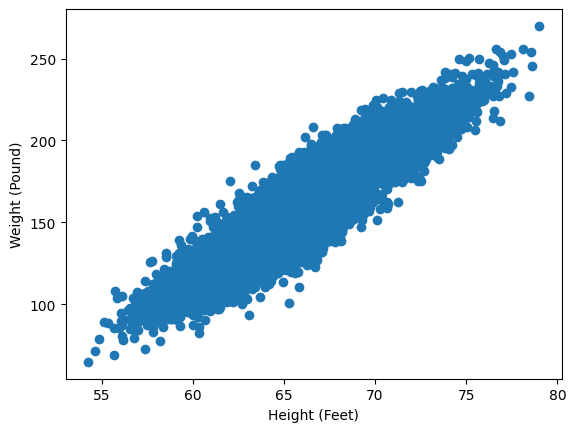

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df.Height, df.Weight)
plt.xlabel('Height (Feet)')
plt.ylabel('Weight (Pound)')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X, y = df.Height.values, df.Weight.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1213)

In [6]:
X_train.shape, X_test.shape # X의 경우 (데이터의 크기, 피처의 개수) 의 형태로 shape이 구성되어야 함
# But, 현재 (8000, )으로 차원이 하나 부족함

((8000,), (2000,))

In [7]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [8]:
X_train.shape, X_test.shape

((8000, 1), (2000, 1))

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

* MSE: 실제 값과 예측값의 차이를 기준으로 오차가 어느 정도인지 계산
* reference: https://bitcodic.tistory.com/m/108

In [10]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE: {mse:.2f}")

MSE: 151.34


## 젠더 특성을 고려하기

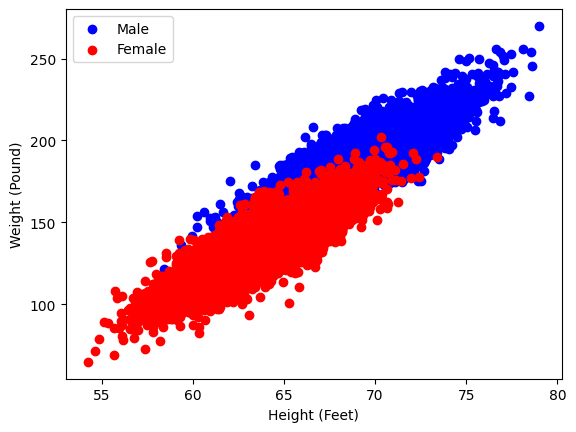

In [11]:
import matplotlib.pyplot as plt

male_df = df[df.Gender == "Male"]
female_df = df[df.Gender == "Female"]

plt.scatter(male_df.Height, male_df.Weight, color= "Blue", label="Male")
plt.scatter(female_df.Height, female_df.Weight, color= "Red", label="Female")
plt.xlabel('Height (Feet)')
plt.ylabel('Weight (Pound)')
plt.legend()
plt.show()

## Model Engineering
* 데이터의 특성을 반영한 인공지능 모델을 개발하는 것이 중요
* 단순하게 모든 데이터를 다 활용해줄 수도 있지만, 데이터 분포를 보면 남자와 여자의 분포가 다름
* Goal: 키가 주어졌을 때, 몸무게를 예측하는 것 (이 때, 성별에 따른 데이터의 분포를 반영)

In [12]:
from sklearn.model_selection import train_test_split

X_male, y_male = male_df.Height.values, male_df.Weight.values
X_male_train, X_male_test, y_male_train, y_male_test = \
train_test_split(X_male, y_male, test_size=0.2, random_state=1213)

X_male_train = X_male_train.reshape(-1,1)
X_male_test = X_male_test.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split

X_female, y_female = female_df.Height.values, female_df.Weight.values
X_female_train, X_female_test, y_female_train, y_female_test = \
train_test_split(X_female, y_female, test_size=0.2, random_state=1213)

X_female_train = X_female_train.reshape(-1,1)
X_female_test = X_female_test.reshape(-1,1)

In [14]:
lr_male = LinearRegression()
lr_male.fit(X_male_train, y_male_train)

LinearRegression()

In [15]:
lr_female = LinearRegression()
lr_female.fit(X_female_train, y_female_train)

LinearRegression()

In [16]:
pred_male = lr_male.predict(X_male_test)
mse_male = mean_squared_error(y_male_test, pred_male)
print(f"MSE male: {mse_male:.2f}")

MSE male: 95.48


In [17]:
pred_female = lr_female.predict(X_female_test)
mse_female = mean_squared_error(y_female_test, pred_female)
print(f"MSE female: {mse_female:.2f}")

MSE female: 102.56


## Conclusion
* Gender를 고려하지 않을 경우: 151.34
* 고려했을 경우: 95.48(Male), 102.56(Female)

* 데이터의 특징을 잘 고려한 모델이 더 좋은 성능을 확보할 수 있음

# Logistic Regression

In [18]:
# train.csv
! wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NdCDgf8g99c6ug_yYFHdHNHWEtoGOmUz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NdCDgf8g99c6ug_yYFHdHNHWEtoGOmUz" -O train.csv && rm -rf ~/cookies.txt

--2023-04-17 09:46:02--  https://docs.google.com/uc?export=download&confirm=&id=1NdCDgf8g99c6ug_yYFHdHNHWEtoGOmUz
Resolving docs.google.com (docs.google.com)... 173.194.214.100, 173.194.214.102, 173.194.214.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5bshiv4hahbrtatmb1p8kfh71fibf2e8/1681724700000/00253795494504996225/*/1NdCDgf8g99c6ug_yYFHdHNHWEtoGOmUz?e=download&uuid=392bb7fb-d31f-4658-8cd6-ce537a12c434 [following]
--2023-04-17 09:46:02--  https://doc-14-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5bshiv4hahbrtatmb1p8kfh71fibf2e8/1681724700000/00253795494504996225/*/1NdCDgf8g99c6ug_yYFHdHNHWEtoGOmUz?e=download&uuid=392bb7fb-d31f-4658-8cd6-ce537a12c434
Resolving doc-14-8k-docs.googleusercontent.com (doc-14-8k-docs.googleusercontent.com)... 173.194.218.1

In [19]:
# test.csv
! wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nIWM6BOp8Xu1rlF6AUQCSfelPuiBu7tF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nIWM6BOp8Xu1rlF6AUQCSfelPuiBu7tF" -O test.csv && rm -rf ~/cookies.txt

--2023-04-17 09:46:02--  https://docs.google.com/uc?export=download&confirm=&id=1nIWM6BOp8Xu1rlF6AUQCSfelPuiBu7tF
Resolving docs.google.com (docs.google.com)... 173.194.214.100, 173.194.214.102, 173.194.214.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2tl27sdin0kpme0g4naiodv7fh4mfb0s/1681724700000/00253795494504996225/*/1nIWM6BOp8Xu1rlF6AUQCSfelPuiBu7tF?e=download&uuid=5f026392-c63a-4473-a4cd-f67c74f70bc8 [following]
--2023-04-17 09:46:03--  https://doc-04-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2tl27sdin0kpme0g4naiodv7fh4mfb0s/1681724700000/00253795494504996225/*/1nIWM6BOp8Xu1rlF6AUQCSfelPuiBu7tF?e=download&uuid=5f026392-c63a-4473-a4cd-f67c74f70bc8
Resolving doc-04-8k-docs.googleusercontent.com (doc-04-8k-docs.googleusercontent.com)... 173.194.218.1

In [20]:
import pandas as pd

train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Analysis

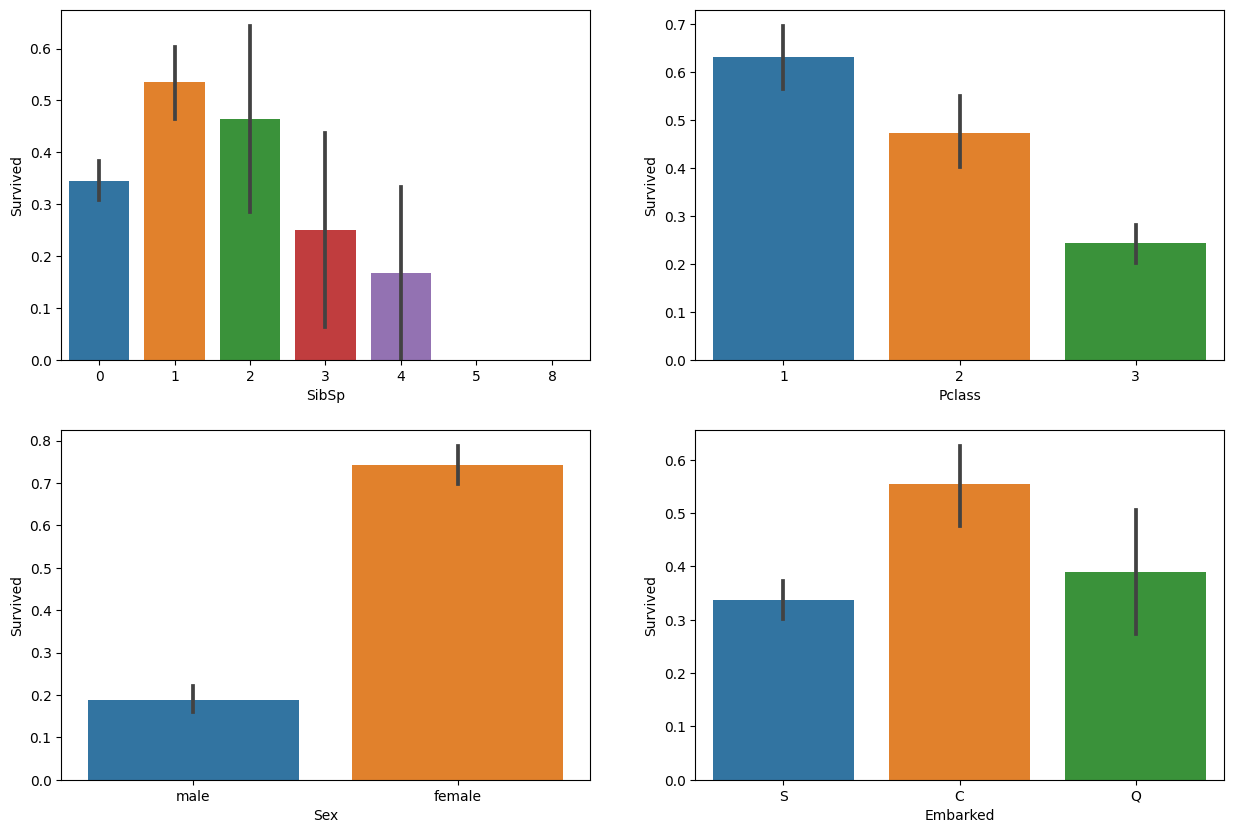

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.barplot(x = 'SibSp', y = 'Survived', data = train_df)
plt.subplot(222)
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)
plt.subplot(223)
sns.barplot(x = 'Sex', y = 'Survived', data = train_df)
plt.subplot(224)
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)
plt.show()

## Processing Data
* 이전까지 활용한 데이터는 실제 데이터가 아닌, scikit-learn에서 제공한 데이터 → 이미 전처리 되어 있음
* 실제로 우리가 연구/개발을 하면서 마주하게 될 데이터는 전처리 필요
* 실제 머신러닝 개발 코드: 머신러닝 관련 코드(10%), 전처리/데이터수집/관리(90%)

### 결측값 처리
* 결측값: 데이터가 없는 상태 (데이터 수집/보관시 여러 문제들로 인하여 데이터가 사라진 것)
* pandas의 isna()를 통해서 결측값 확인

#### 1. 결측값 0으로 처리
* 결측값이 ML 학습 시 에러 유발 → 0으로 채움

#### 2. 결측값을 평균으로 처리
* 1번의 경우 잘못된 데이터가 학습될 가능성이 큼
* 결측값을 평균으로 처리 → 결측 데이터의 영향을 최소화할 수 있음

#### 3. 빈도 높은 값으로 결측값 채우기
* 결측값이 실수/정수 데이터가 아닌 경우 → 가장 빈도 높은 값으로 채움

In [24]:
train_df.isna().sum() # 훈련데이터에서의 결측 값 데이터 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
test_df.isna().sum() # 테스트 데이터에서의 결측값 확인

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* Age/Fare은 연속성있는 데이터이기 때문에 평균값으로, Embarked는 빈도 높은 값으로 결측치 채워줌
* Cabin은 훈련에 영향을 줄 정도로 결측값의 양이 많아 사용 X

In [26]:
AverageAge = train_df.Age.mean()
train_df.Age = train_df.Age.fillna(AverageAge)

AverageAge = test_df.Age.mean()
test_df.Age = test_df.Age.fillna(AverageAge)

AverageFare = test_df.Fare.mean()
test_df.Fare = test_df.Fare.fillna(AverageFare)

FrequentEmbarked = train_df.Embarked.value_counts().idxmax()
train_df.Embarked = train_df.Embarked.fillna(FrequentEmbarked)

In [27]:
train_df.isna().sum() # 잘 바뀌었는지 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [28]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## 데이터 전처리하기

### 1. 실수값 변환
* 실수값이 아닌 데이터의 경우, 실수값 변환 필요
* Sex, Embarked의 dtype: string → 실수값으로 데이터 변환

### 2. Normalization 수행
* 특정 데이터만 데이터의 범위가 너무 클 경우, 머신러닝 훈련 시 범위가 큰 데이터에 영향을 크게 받게됨
* → 사용할 모든 데이터를 0 ~ 1 사이의 값으로 변경

In [29]:
column_to_use = ["Pclass", "Sex", "Age", "SibSp","Parch", "Fare", "Embarked"]
train_x = train_df[column_to_use].copy()
test_x = test_df[column_to_use].copy()

#### copy()
* 파이썬의 리스트 or 판다스 객체와 같은 경우, 변수 자체에 값을 할당하는 C언어와 달리 변수에 데이터가 저장된 위치를 저장함
* copy()를 쓰지 않을 경우 train에 train_df가 복사되어 들어가는게 아니라, train_df의 위치가 저장되어 train_df와 train이 결국에는 같은 데이터를 지칭하게 됨
* 그러므로 train을 변형하면 train_df까지 바꾸어야 할지, train변수를 복사한것으로 간주해야 할지 모르는 문제가 발생
* 따라서 copy() 함수를 통해 train변수에 train_df의 위치를 저장하는 게 아니라, train_df의 데이터 자체를 복사해 넣어줌

In [30]:
train_x["Sex"] = train_x.Sex.apply(lambda x: 0 if x=="male" else 1)
test_x["Sex"] = test_x.Sex.apply(lambda x: 0 if x=="male" else 1)

Embark2Float = {"S":0, "C":1, "Q":2}
train_x.Embarked = train_x.Embarked.apply(lambda x:Embark2Float[x])
test_x.Embarked = test_x.Embarked.apply(lambda x:Embark2Float[x])

In [31]:
train_y = train_df.Survived
# test_df는 실제 테스트용 데이터이기 때문에, y값에 해당하는 Survived가 존재하지 않는다.

In [32]:
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [34]:
train_x.shape, test_x.shape

((891, 7), (418, 7))

## Model Training
* train_df에서 validation 데이터 분리

In [35]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1213)

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100, penalty="l2")
lr.fit(train_x, train_y)
print(f"Accuray: {lr.score(val_x, val_y):.2f}")

Accuray: 0.82


Text(0.5, 1.0, 'Feature Importance')

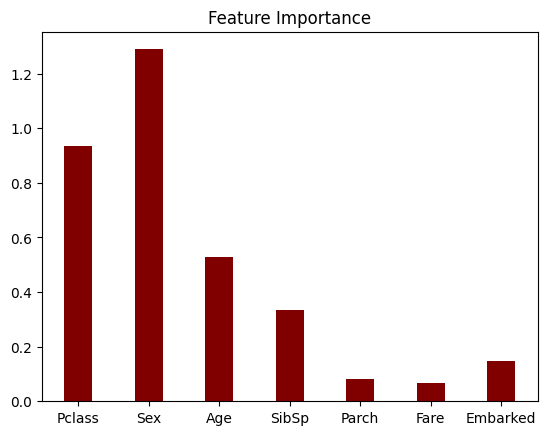

In [37]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(column_to_use, np.abs(lr.coef_)[0], color ='maroon', width = 0.4)
plt.title("Feature Importance")

# 실습과제 1

* Linear Regression의 파라미터를 바꿔보며, 성능을 관찰해보세요.
* dataset은 weight_height.csv를 사용하시면 됩니다.

* *reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html*

In [38]:
# Linear Regression
# default
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE: {mse:.4f}")
# fit_intercept = False
lr = LinearRegression(fit_intercept=False, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE: {mse:.4f}")
# copy_X = False
lr = LinearRegression(fit_intercept=True, copy_X=False, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE: {mse:.4f}")
# n_jobs = -1 
lr = LinearRegression(fit_intercept=True, copy_X=False, n_jobs=-1, positive=False)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE: {mse:.4f}")

MSE: 151.3418
MSE: 552.8934
MSE: 151.3418
MSE: 264561.2265


# 실습과제 2

* Logistic Regression의 파라미터를 바꿔보며, 성능을 관찰해보세요.
* dataset은 titanic(i.e. train.csv)를 사용하시면 됩니다.

* *reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

In [40]:
# Logistic Regression
# default 

# Tolerance
Tolerance = [0.00001, 0.0000001, 0.00000001, 0.0000000001]
print('# Tolerance')
for tol in Tolerance :
    lr = LogisticRegression(max_iter=100, penalty="l2", tol=tol)
    lr.fit(train_x, train_y)
    print('max_iter : ', tol)
    print(f"Accuray: {lr.score(val_x, val_y):.4f}")

# max_iter
max_iter = [100, 200, 300, 400, 500, 600]
print('# max_iter')
for it in max_iter :
    lr = LogisticRegression(max_iter=it, penalty="l2")
    lr.fit(train_x, train_y)
    print('max_iter : ', it)
    print(f"Accuray: {lr.score(val_x, val_y):.4f}")

# C
C = [0.01, 0.1, 0.5, 1.0, 1.2, 1.5]
print('# C')
for c in C :
    lr = LogisticRegression(max_iter=100, penalty="l2", C = c)
    lr.fit(train_x, train_y)
    print('C :', c)
    print(f"Accuray: {lr.score(val_x, val_y):.4f}")

# Optimization methods
optim = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
print('# optimization methods :')
for opt in optim :
    lr = LogisticRegression(max_iter=100, penalty="l2", solver=opt)
    lr.fit(train_x, train_y)
    print(opt)
    print(f"Accuray: {lr.score(val_x, val_y):.4f}")

# C = 0.1일때 Accuracy가 상승

# Tolerance
max_iter :  1e-05
Accuray: 0.8156
max_iter :  1e-07
Accuray: 0.8156
max_iter :  1e-08
Accuray: 0.8156
max_iter :  1e-10
Accuray: 0.8156
# max_iter
max_iter :  100
Accuray: 0.8156
max_iter :  200
Accuray: 0.8156
max_iter :  300
Accuray: 0.8156
max_iter :  400
Accuray: 0.8156
max_iter :  500
Accuray: 0.8156
max_iter :  600
Accuray: 0.8156
# C
C : 0.01
Accuray: 0.8156
C : 0.1
Accuray: 0.8268
C : 0.5
Accuray: 0.8212
C : 1.0
Accuray: 0.8156
C : 1.2
Accuray: 0.8156
C : 1.5
Accuray: 0.8156
# optimization methods :
lbfgs
Accuray: 0.8156
newton-cg
Accuray: 0.8156
newton-cholesky
Accuray: 0.8156
sag
Accuray: 0.8156
saga
Accuray: 0.8156
